### Contents

#### - ***`Question`***:

- 1. Examine the provided Dubai real estate data - sales and rental transactions only - to uncover key insights and trends. Support your findings with relevant visualizations. (10 points)

- 2. Utilize the additional datasets to identify macroeconomic factors, such as GDP, tourism, population, and energy, that may impact the real estate market. (10 points)

- 3. Explore the correlations between these macroeconomic factors and property sale or rental prices. Highlight the most significant factors driving market behavior. (10 points)

#### - ***`Solution`***:

**Exploratory Data Analysis (EDA) Plan**

To perform a comprehensive EDA and address the required question, we'll examine **Dubai's real estate data** alongside **macroeconomic datasets** using these step-by-step approach:

---

##### **Step 1: Real Estate Data (Sales & Rentals)**

**Tasks:**
1. **Load and Inspect Data:**
   - Load `processed_rents.parquet` and `processed_transactions.parquet` datasets.
   - Check for missing values, data types, and anomalies.

2. **Univariate Analysis:**
   - Distribution of property types, sizes, and rental/sale prices.
   - Time-series trends for transaction volume and average prices.

3. **Bivariate Analysis:**
   - Analyze price variations by:
     - Property type/sub-type.
     - Number of bedrooms.
     - Area/neighborhood.
     - Usage (commercial vs. residential).

4. **Temporal Trends:**
   - Investigate seasonal variations in rental and sale prices.
   - Assess trends over months and years.

5. **Visualization Examples:**
   - Histograms for price distributions.
   - Bar charts for property types and usage.
   - Line charts for temporal trends.

---

##### **Step 2: Macroeconomic Data**

**Datasets:**
- **GDP (Quarterly)**:
  - Examine Dubai’s GDP growth trends.
  - Plot GDP vs. average property prices.

- **Tourism**:
  - Analyze tourist arrivals and their relationship with rental demand.

- **Population**:
  - Investigate population growth and its correlation with property transactions.

- **Consumer Price Index (CPI)**:
  - Correlate inflation data with property prices.

- **Currency Strength (AED-USD Exchange Rates)**:
  - Explore how exchange rate fluctuations impact foreign investment in real estate.

**Tasks:**
1. **Load and Inspect Data:**
   - Check for missing values, data ranges, and formatting issues.

2. **Temporal Trends:**
   - Examine macroeconomic indicators over time.

3. **Correlation Analysis:**
   - Compute correlations between property prices and macroeconomic indicators.

4. **Visualization Examples:**
   - Scatter plots for GDP, population, and property prices.
   - Heatmaps to display correlation matrices.

---

##### **Step 3: Integration and Key Insights**

**Tasks:**
1. **Combine Data:**
   - Merge real estate data with macroeconomic indicators based on time periods.

2. **Identify Significant Factors:**
   - Use correlation coefficients and simple regressions to pinpoint key drivers.

3. **Key Insights:**
   - Highlight the strongest correlations and trends.
   - Identify unexpected patterns, such as mismatches between GDP growth and property prices.

---

### 1a. Load and Inspect Data

In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns


sys.path.append("../utils")

# Import the data_loader module
import data_loader, data_processor, plots


In [2]:
rents_df = pd.read_parquet('../datasets/processed/processed_rents_df.parquet', engine='fastparquet')
transactions_df = pd.read_parquet('../datasets/processed/processed_transactions_df.parquet', engine='fastparquet')


In [3]:
gdp_quarterly_constant_df = pd.read_parquet("../datasets/processed/processed_gdp_quarterly_constant_df.parquet")
gdp_quarterly_current_df = pd.read_parquet("../datasets/processed/processed_gdp_quarterly_current_df.parquet")
tourism_indicators_df = pd.read_parquet("../datasets/processed/processed_tourism_indicators_df.parquet")
tourism_regions_df = pd.read_parquet("../datasets/processed/processed_tourism_regions_df.parquet")
tourism_ratings_df = pd.read_parquet("../datasets/processed/processed_tourism_ratings_df.parquet")
pop_estimates_df = pd.read_parquet("../datasets/processed/processed_pop_estimates_df.parquet")
pop_indicators_df = pd.read_parquet("../datasets/processed/pop_indicators.parquet")
currency_strength_df = pd.read_parquet("../datasets/processed/currency_strength_df.parquet")


In [4]:
data_processor.display_dataframe_info(currency_strength_df)

Shape: (5468, 8)
Dtypes: ['Open:float64', 'High:float64', 'Low:float64', 'Close:float64', 'Adj Close:float64', 'Volume:int64', 'Date:object', 'Return:float64']
Missings (%): ['Open:0.00%', 'High:0.00%', 'Low:0.00%', 'Close:0.00%', 'Adj Close:0.00%', 'Volume:0.00%', 'Date:0.00%', 'Return:0.02%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.33 MB


,Open,High,Low,Close,Adj Close,Volume,Date,Return
0,0.272331,0.272368,0.272331,0.272368,0.272368,0,2003-12-01,NaN
1,0.272413,0.272420,0.272331,0.272368,0.272368,0,2003-12-02,0.0


In [38]:
data_processor.display_dataframe_info(pop_indicators_df)

Shape: (18, 11)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'POP_IND:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'GENDER:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:float64', 'DECIMALS:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'POP_IND:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'GENDER:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%', 'DECIMALS:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.00 MB


,DATAFLOW,MEASURE,POP_IND,UNIT_MEASURE,REF_AREA,FREQ,GENDER,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_POP_IND(2.7.0),POPIND,MED,YEARS,AE,A,_Z,FCSC,2019,31.3,1
1,FCSA:DF_POP_IND(2.7.0),POPIND,MED,YEARS,AE,A,_Z,FCSC,2020,32.8,1


In [37]:
data_processor.display_dataframe_info(pop_estimates_df)

Shape: (162, 10)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'POP_IND:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'GENDER:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'POP_IND:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'GENDER:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.01 MB


,DATAFLOW,MEASURE,POP_IND,UNIT_MEASURE,REF_AREA,FREQ,GENDER,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_POP(2.7.0),POP,_Z,PS,AE,A,M,FCSC,1970,149195
1,FCSA:DF_POP(2.7.0),POP,_Z,PS,AE,A,M,FCSC,1971,181473


In [36]:
data_processor.display_dataframe_info(tourism_ratings_df)

Shape: (400, 11)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'H_TYPE:object', 'H_INDICATOR:object', 'GUEST_REGION:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'H_TYPE:0.00%', 'H_INDICATOR:0.00%', 'GUEST_REGION:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.03 MB


,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,H_TYPE,H_INDICATOR,GUEST_REGION,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_HOT_TYPE(4.3.0),H,NUMBER,AE,A,_T,EST,_Z,FCSC,2014,1027
1,FCSA:DF_HOT_TYPE(4.3.0),H,NUMBER,AE,A,_T,EST,_Z,FCSC,2015,1056


In [35]:
data_processor.display_dataframe_info(tourism_regions_df)

Shape: (664, 11)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'H_TYPE:object', 'H_INDICATOR:object', 'GUEST_REGION:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'H_TYPE:0.00%', 'H_INDICATOR:0.00%', 'GUEST_REGION:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.06 MB


,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,H_TYPE,H_INDICATOR,GUEST_REGION,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_GUEST_REGION(4.3.0),H,NUMBER,AE,A,_Z,GHH,OC,FCSC,2015,399751
1,FCSA:DF_GUEST_REGION(4.3.0),H,NUMBER,AE,A,_Z,GHH,OC,FCSC,2016,380717


In [34]:
data_processor.display_dataframe_info(tourism_indicators_df)

Shape: (201, 11)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'H_TYPE:object', 'H_INDICATOR:object', 'GUEST_REGION:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:float64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'H_TYPE:0.00%', 'H_INDICATOR:0.00%', 'GUEST_REGION:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.02 MB


,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,H_TYPE,H_INDICATOR,GUEST_REGION,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_HOT_INDICATOR(4.3.0),H,AED,AE,A,_Z,RR,_Z,FCSC,1985,318484.0
1,FCSA:DF_HOT_INDICATOR(4.3.0),H,AED,AE,A,_Z,RR,_Z,FCSC,1986,298504.0


In [33]:
data_processor.display_dataframe_info(gdp_quarterly_current_df)

Shape: (1920, 12)
Dtypes: ['DATAFLOW:object', 'REF_AREA:object', 'FREQ:object', 'UNIT_MEASURE:object', 'SOURCE_DETAIL:object', 'MEASURE:object', 'QUARTER:object', 'QGDP_SYS:object', 'QGDP_UNIT:object', 'TIME_PERIOD:int64', 'OBS_VALUE:float64', 'DECIMALS:int64']
Missings (%): ['DATAFLOW:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'UNIT_MEASURE:0.00%', 'SOURCE_DETAIL:0.00%', 'MEASURE:0.00%', 'QUARTER:0.00%', 'QGDP_SYS:0.00%', 'QGDP_UNIT:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%', 'DECIMALS:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.18 MB


,DATAFLOW,REF_AREA,FREQ,UNIT_MEASURE,SOURCE_DETAIL,MEASURE,QUARTER,QGDP_SYS,QGDP_UNIT,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_QGDP_CUR(1.8.0),AE,Q,PERCENT,FCSC,NFC,Q3,CUR,GWTH_RATE,2013,4.355075,1
1,FCSA:DF_QGDP_CUR(1.8.0),AE,Q,PERCENT,FCSC,NFC,Q3,CUR,GWTH_RATE,2014,4.394883,1


In [32]:
data_processor.display_dataframe_info(gdp_quarterly_constant_df)

Shape: (1920, 12)
Dtypes: ['DATAFLOW:object', 'REF_AREA:object', 'FREQ:object', 'UNIT_MEASURE:object', 'SOURCE_DETAIL:object', 'MEASURE:object', 'QUARTER:object', 'QGDP_SYS:object', 'QGDP_UNIT:object', 'TIME_PERIOD:int64', 'OBS_VALUE:float64', 'DECIMALS:int64']
Missings (%): ['DATAFLOW:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'UNIT_MEASURE:0.00%', 'SOURCE_DETAIL:0.00%', 'MEASURE:0.00%', 'QUARTER:0.00%', 'QGDP_SYS:0.00%', 'QGDP_UNIT:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%', 'DECIMALS:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.18 MB


,DATAFLOW,REF_AREA,FREQ,UNIT_MEASURE,SOURCE_DETAIL,MEASURE,QUARTER,QGDP_SYS,QGDP_UNIT,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_QGDP_CON(1.8.0),AE,Q,MILAED,FCSC,ELE,Q1,CON,VAL,2012,6029.460989,0
1,FCSA:DF_QGDP_CON(1.8.0),AE,Q,MILAED,FCSC,ELE,Q1,CON,VAL,2013,6516.431786,0


In [3]:
data_processor.display_dataframe_info(rents_df)

Shape: (5380162, 18)
Dtypes: ['Ejari Contract Number:int64', 'Registration Date:datetime64[ns]', 'Start Date:category', 'End Date:datetime64[ns]', 'Property ID:int64', 'Version:category', 'Area:category', 'Contract Amount:float64', 'Annual Amount:float64', 'Is Free Hold?:category', 'Property Size (sq.m):float64', 'Property Type:category', 'Property Sub Type:category', 'Usage:category', 'Nearest Metro:category', 'Nearest Mall:category', 'Nearest Landmark:category', 'No of Units:int64']
Missings (%): ['Ejari Contract Number:0.00%', 'Registration Date:0.00%', 'Start Date:0.00%', 'End Date:0.00%', 'Property ID:0.00%', 'Version:0.00%', 'Area:0.01%', 'Contract Amount:2.79%', 'Annual Amount:5.82%', 'Is Free Hold?:0.00%', 'Property Size (sq.m):50.15%', 'Property Type:0.00%', 'Property Sub Type:0.74%', 'Usage:1.02%', 'Nearest Metro:9.55%', 'Nearest Mall:10.23%', 'Nearest Landmark:6.43%', 'No of Units:0.00%']
Total missings (%): 4.82%
total duplicates: 0
Total memory usage: 431.02 MB


,Ejari Contract Number,Registration Date,Start Date,End Date,Property ID,Version,Area,Contract Amount,Annual Amount,Is Free Hold?,Property Size (sq.m),Property Type,Property Sub Type,Usage,Nearest Metro,Nearest Mall,Nearest Landmark,No of Units
0,120210425000238,2021-04-25 09:36:31,2014-06-25,2026-04-12,1058329686,New,Dubai Investment Park Second,25000.0,5000.0,Free Hold,NaN,Building,Factory,Industrial,NaN,NaN,Expo 2020 Site,1
1,120210526001582,2021-05-26 12:12:22,2014-06-26,2025-11-30,99539298,New,Um Nahad Third,16000000.0,4000000.0,Free Hold,6792.0,Building,Building,Residential,NaN,NaN,NaN,1


In [4]:
data_processor.display_dataframe_info(transactions_df)

Shape: (995975, 22)
Dtypes: ['Transaction Number:object', 'Transaction Date:object', 'Property ID:int64', 'Transaction Type:category', 'Transaction sub type:category', 'Registration type:category', 'Is Free Hold?:category', 'Usage:category', 'Area:category', 'Property Type:category', 'Property Sub Type:category', 'Amount:float64', 'Transaction Size (sq.m):float64', 'Property Size (sq.m):float64', 'Room(s):category', 'Parking:object', 'Nearest Metro:category', 'Nearest Mall:category', 'Nearest Landmark:category', 'No. of Buyer:float64', 'No. of Seller:float64', 'Project:category']
Missings (%): ['Transaction Number:0.00%', 'Transaction Date:0.00%', 'Property ID:0.00%', 'Transaction Type:0.00%', 'Transaction sub type:0.00%', 'Registration type:0.00%', 'Is Free Hold?:0.00%', 'Usage:0.00%', 'Area:0.00%', 'Property Type:0.00%', 'Property Sub Type:2.23%', 'Amount:0.00%', 'Transaction Size (sq.m):12.62%', 'Property Size (sq.m):0.00%', 'Room(s):23.88%', 'Parking:49.53%', 'Nearest Metro:21.70%'

,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,...,Transaction Size (sq.m),Property Size (sq.m),Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Project
0,13-7700-2022,02/06/2022 16:18,44581083,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,174.8,174.8,NaN,None,NaN,NaN,Dubai Cycling Course,0.0,0.0,DAMAC HILLS (2) - ODORA
1,13-7699-2022,02/06/2022 16:14,44014284,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,174.8,174.8,NaN,None,NaN,NaN,Dubai Cycling Course,0.0,0.0,DAMAC HILLS (2) - ZINNIA


### 1b. Univariate Analysis: Histograms for All Variables

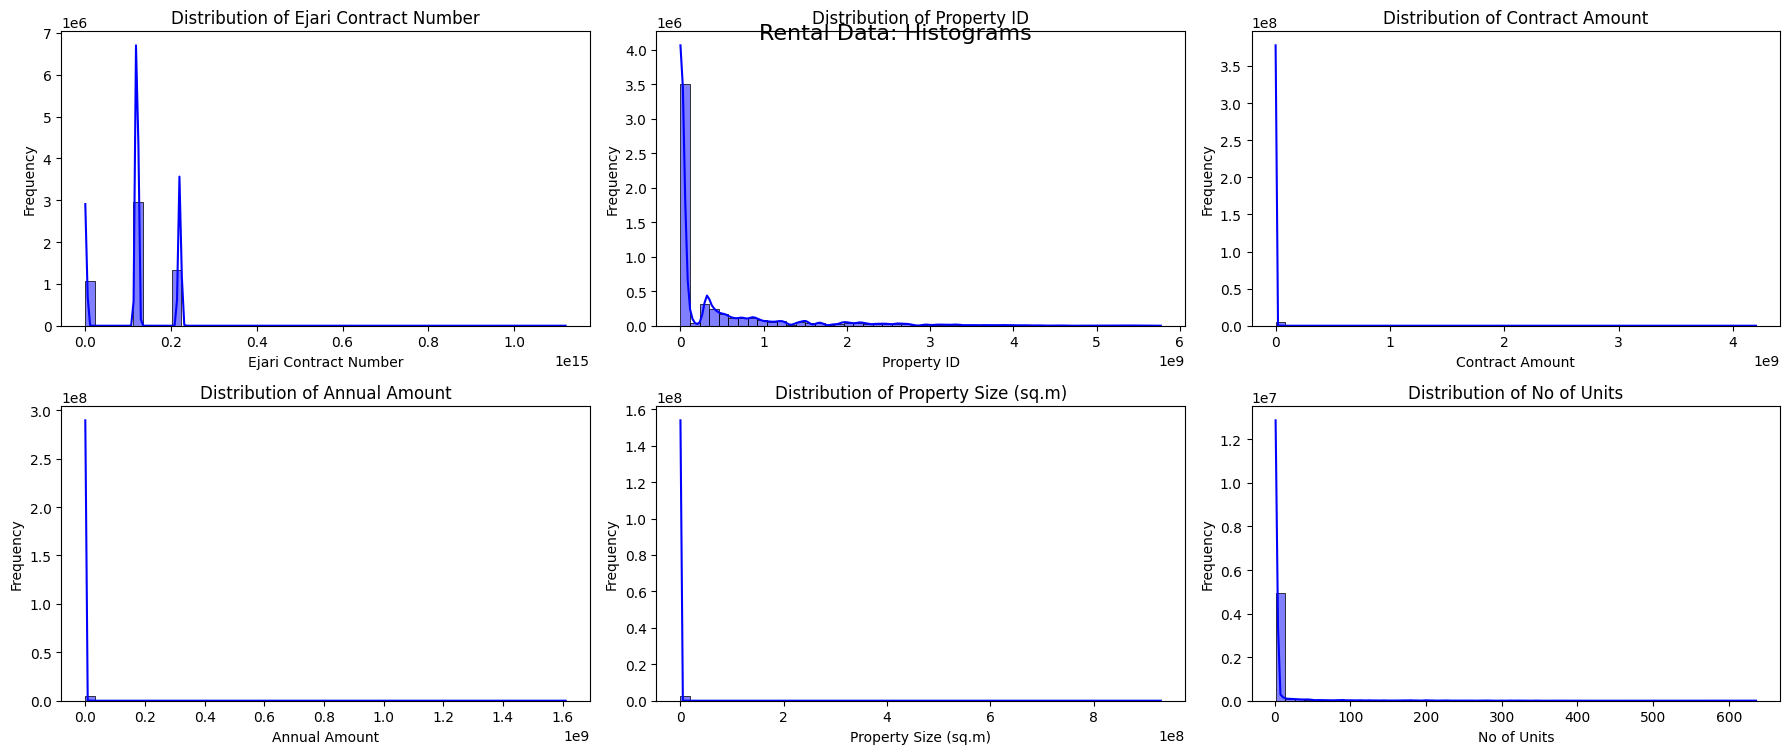

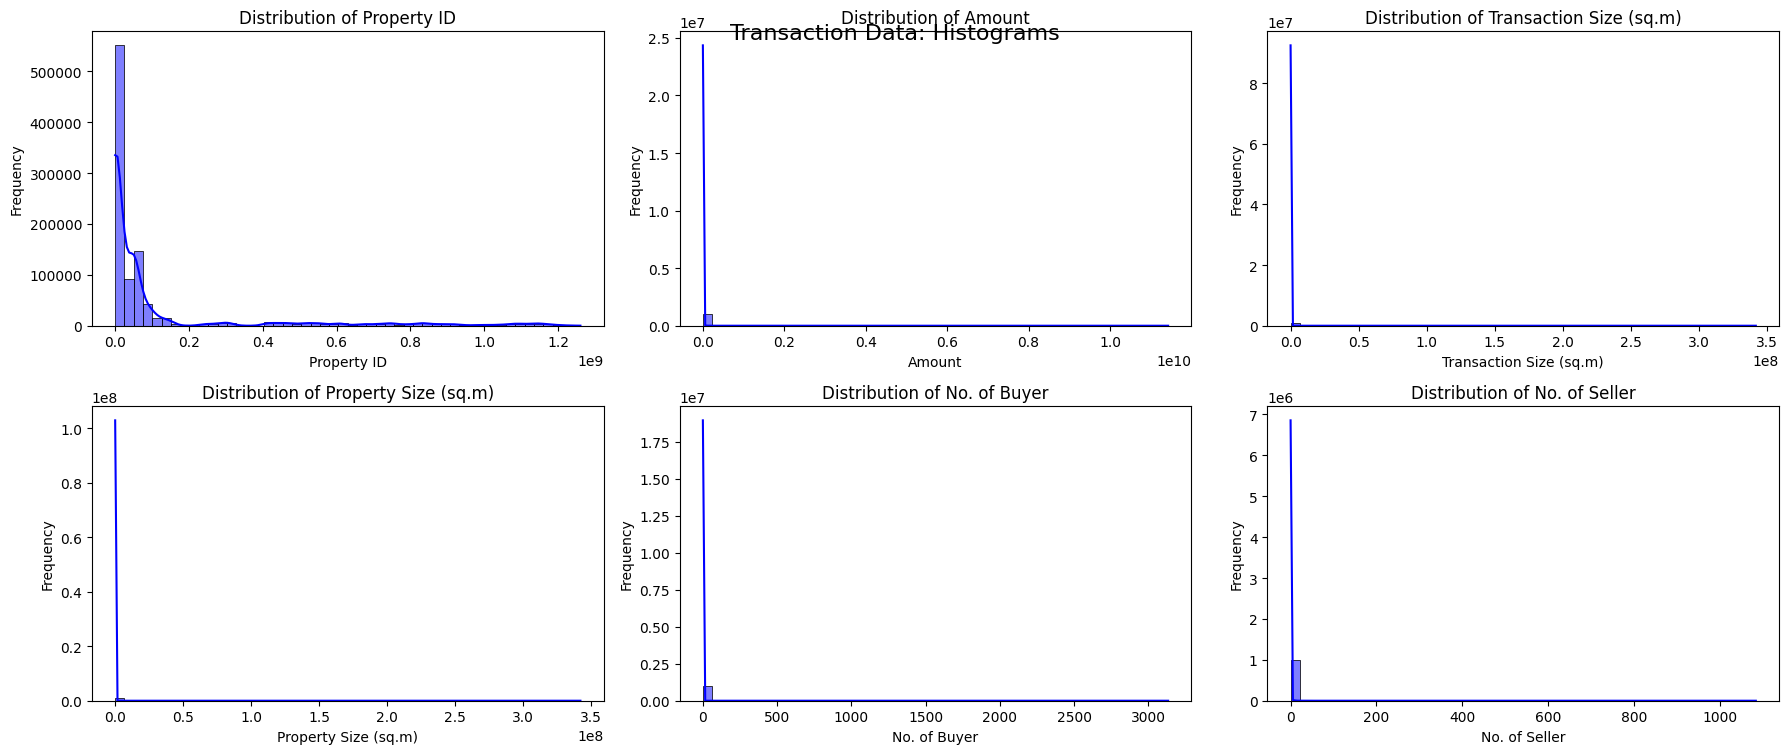

In [5]:
plots.plot_histograms(rents_df, title="Rental Data: Histograms")
plots.plot_histograms(transactions_df, title="Transaction Data: Histograms")

### 1c. Univariate Analysis: Count Plot for All Categorical Variables

In [6]:

categorical_columns = [
    'Property Type', 
    'Property Sub Type', 
    'Usage', 
    'Area', 
    'Is Free Hold?', 
    'Nearest Metro', 
    'Nearest Mall', 
    'Nearest Landmark'
]


In [ ]:
# Call the function
# plots.plot_countplots(rents_df, categorical_columns)
plots.plot_countplots(transactions_df, categorical_columns, max_categories=10)

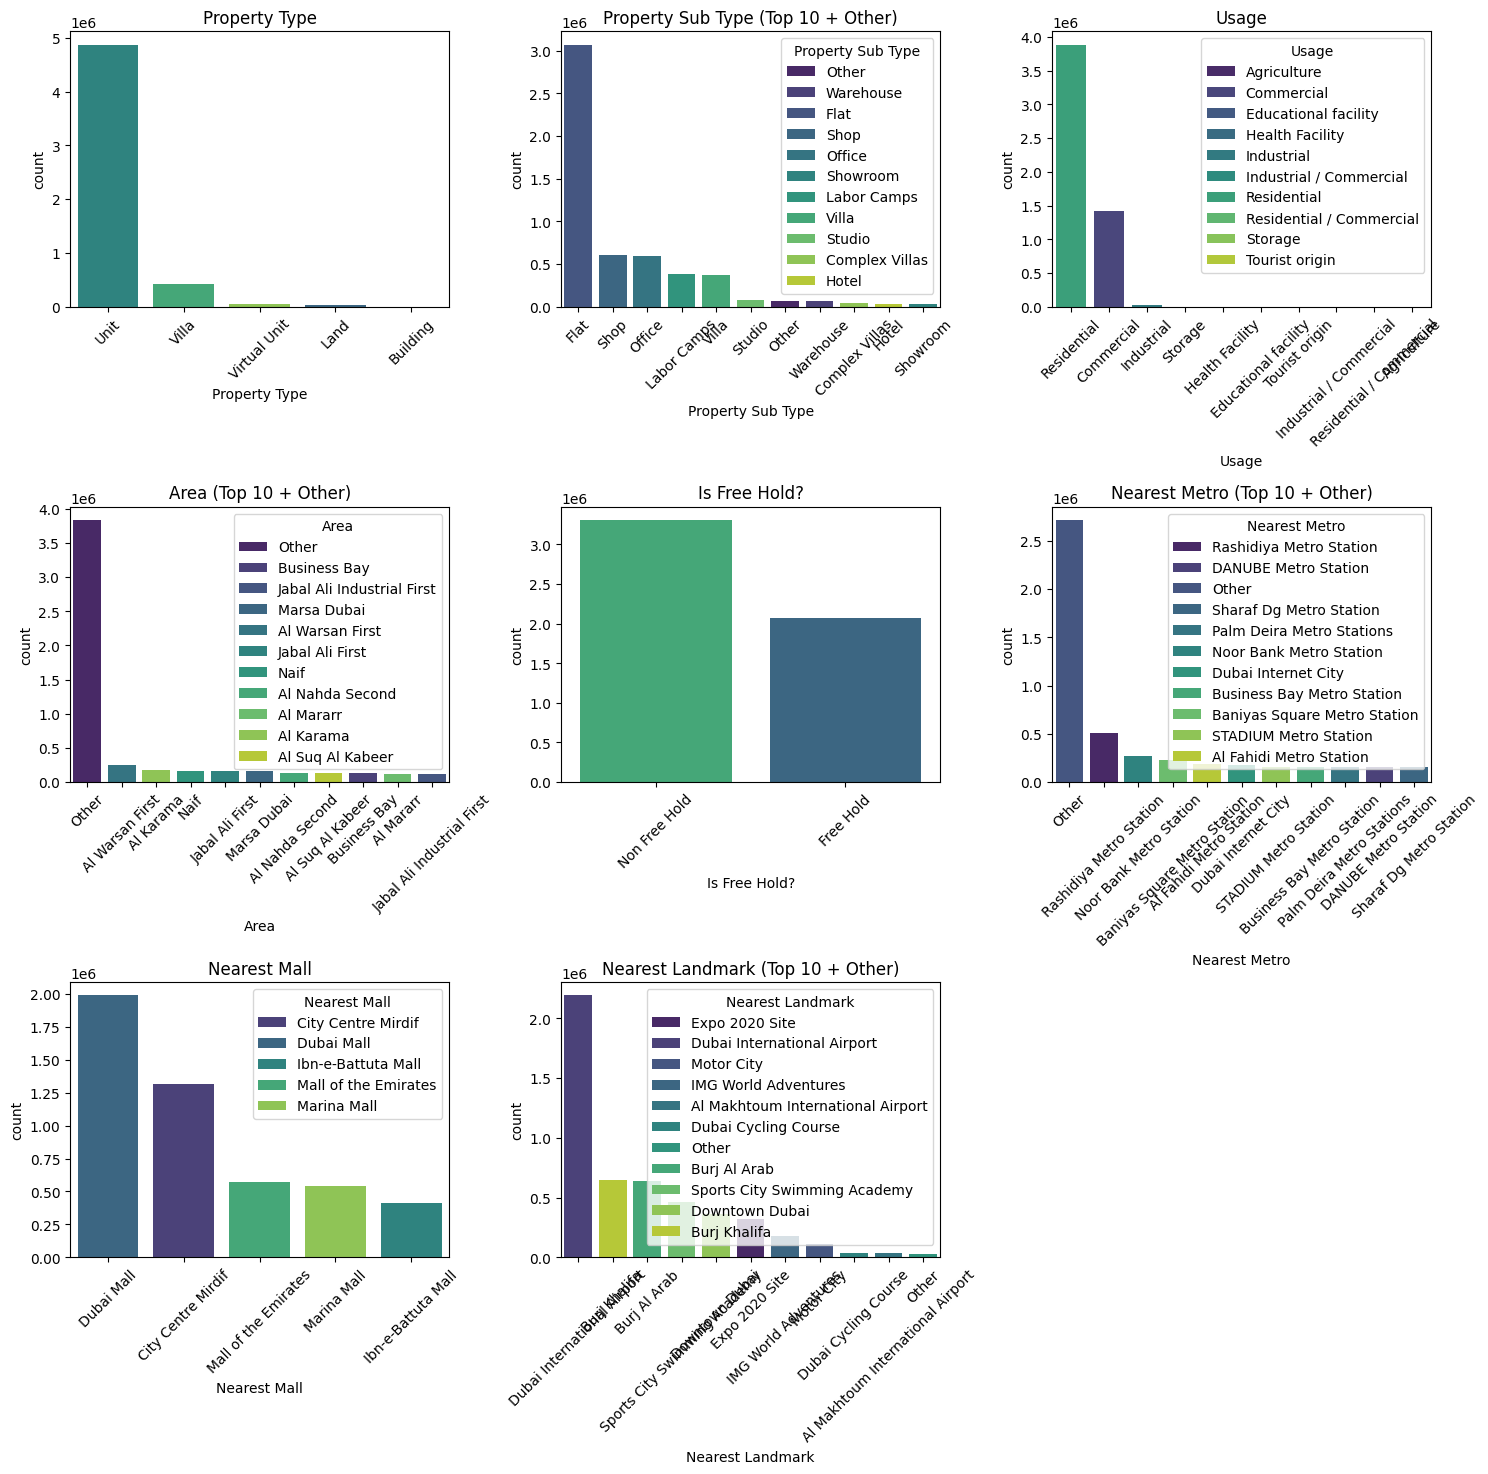

In [23]:
# plots.plot_countplots(transactions_df, categorical_columns)
plots.plot_countplots(rents_df, categorical_columns, max_categories=10)


### 1d. Univariate/Multivariate Analysis: Trends with Comparison Option

<Figure size 1400x400 with 0 Axes>

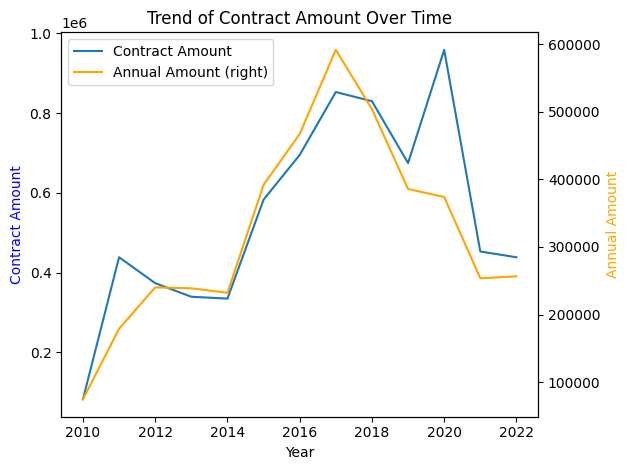

In [22]:
# Usage
plots.plot_trends(
    rents_df, 
    main_col='Contract Amount', 
    time_col='Registration Date', 
    secondary_col='Annual Amount'
)


In [ ]:
rents_df['Registration Date'].describe()

count                          5380162
mean     2017-12-12 00:47:45.615532544
min                2010-05-18 19:44:30
25%      2015-07-26 11:47:41.249999872
50%                2018-03-15 09:23:17
75%                2020-07-20 11:29:53
max                2022-06-03 12:25:51
Name: Registration Date, dtype: object

In [14]:
# Process the 'Transaction Date' column
processed_transactions_df = plots.process_transaction_dates(transactions_df)

# Check the updates
processed_transactions_df[['Transaction Date', 'Year', 'Month', 'Day', 'Hour']].head()



,Transaction Date,Year,Month,Day,Hour
0,2022-06-02 16:18:00,2022,6,2,16
1,2022-06-02 16:14:00,2022,6,2,16
2,2022-06-02 15:42:00,2022,6,2,15
3,2022-06-02 15:22:00,2022,6,2,15
4,2022-06-02 15:07:00,2022,6,2,15


In [28]:
processed_transactions_df['Transaction Date'].describe()
# transactions_df['Transaction Date']

count                           995975
mean     2015-01-18 13:58:10.776414464
min                1995-03-07 00:00:00
25%                2011-02-28 13:40:00
50%                2015-02-19 19:01:00
75%                2019-02-26 13:36:00
max                2022-06-02 16:18:00
Name: Transaction Date, dtype: object

<Figure size 1400x400 with 0 Axes>

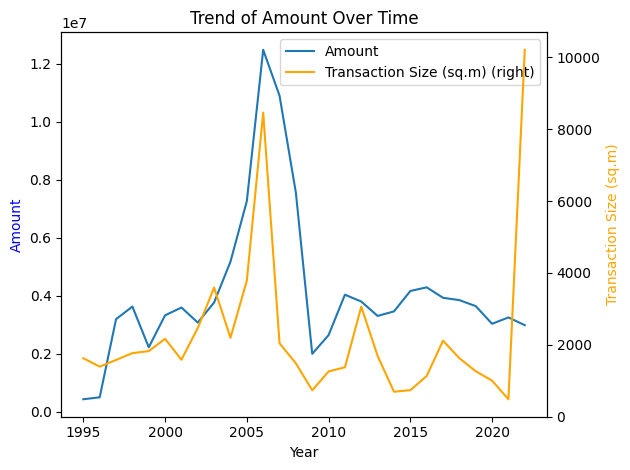

In [29]:
plots.plot_trends(
    processed_transactions_df, 
    main_col='Amount', 
    time_col='Transaction Date', 
    secondary_col='Transaction Size (sq.m)'
)


### 2. Micro-economics Factors Influence

#### 2.1.  Summary Statistics

- GDP Quarterly Constant Prices Summary Stats

In [4]:
gdp_quarterly_constant_df

,DATAFLOW,REF_AREA,FREQ,UNIT_MEASURE,SOURCE_DETAIL,MEASURE,QUARTER,QGDP_SYS,QGDP_UNIT,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_QGDP_CON(1.8.0),AE,Q,MILAED,FCSC,ELE,Q1,CON,VAL,2012,6029.460989,0
1,FCSA:DF_QGDP_CON(1.8.0),AE,Q,MILAED,FCSC,ELE,Q1,CON,VAL,2013,6516.431786,0
2,FCSA:DF_QGDP_CON(1.8.0),AE,Q,MILAED,FCSC,ELE,Q1,CON,VAL,2014,7282.519220,0
3,FCSA:DF_QGDP_CON(1.8.0),AE,Q,MILAED,FCSC,ELE,Q1,CON,VAL,2015,5581.622819,0
4,FCSA:DF_QGDP_CON(1.8.0),AE,Q,MILAED,FCSC,ELE,Q1,CON,VAL,2016,6507.318473,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1915,FCSA:DF_QGDP_CON(1.8.0),AE,Q,PERCENT,FCSC,CON,Q4,CON,GWTH_RATE,2019,-0.492972,1
1916,FCSA:DF_QGDP_CON(1.8.0),AE,Q,PERCENT,FCSC,CON,Q4,CON,GWTH_RATE,2020,-9.141739,1
1917,FCSA:DF_QGDP_CON(1.8.0),AE,Q,PERCENT,FCSC,CON,Q4,CON,GWTH_RATE,2021,3.444517,1
1918,FCSA:DF_QGDP_CON(1.8.0),AE,Q,PERCENT,FCSC,CON,Q4,CON,GWTH_RATE,2022,9.629000,1


In [6]:
num_features = gdp_quarterly_constant_df.select_dtypes(include="number").columns
gdp_quarterly_constant_df[num_features]

,TIME_PERIOD,OBS_VALUE,DECIMALS
0,2012,6029.460989,0
1,2013,6516.431786,0
2,2014,7282.519220,0
3,2015,5581.622819,0
4,2016,6507.318473,0
...,...,...,...
1915,2019,-0.492972,1
1916,2020,-9.141739,1
1917,2021,3.444517,1
1918,2022,9.629000,1


In [4]:
plots.compute_summary_statistics(gdp_quarterly_constant_df)



--- Summary Statistics ---
              count          mean           std          min          25%          50%          75%          max
TIME_PERIOD  1920.0   2018.000000      3.488984  2012.000000  2015.000000  2018.000000   2021.00000    2024.0000
OBS_VALUE    1920.0  33871.691457  84704.603183   -50.998461     4.703341  1719.233685  19854.47116  449633.4527
DECIMALS     1920.0      0.479167      0.499696     0.000000     0.000000     0.000000      1.00000       1.0000

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
REF_AREA                      0.0
FREQ                          0.0
UNIT_MEASURE                  0.0
SOURCE_DETAIL                 0.0
MEASURE                       0.0
QUARTER                       0.0
QGDP_SYS                      0.0
QGDP_UNIT                     0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0
DECIMALS                      0.0


- GDP Quarterly Current Prices Summary Stats

In [5]:
plots.compute_summary_statistics(gdp_quarterly_current_df)


--- Summary Statistics ---
              count          mean           std          min          25%          50%           75%          max
TIME_PERIOD  1920.0   2018.000000      3.488984  2012.000000  2015.000000  2018.000000   2021.000000    2024.0000
OBS_VALUE    1920.0  35877.089588  89844.504067   -66.978072     5.387548  2087.586568  21518.734995  506021.1521
DECIMALS     1920.0      0.479167      0.499696     0.000000     0.000000     0.000000      1.000000       1.0000

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
REF_AREA                      0.0
FREQ                          0.0
UNIT_MEASURE                  0.0
SOURCE_DETAIL                 0.0
MEASURE                       0.0
QUARTER                       0.0
QGDP_SYS                      0.0
QGDP_UNIT                     0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0
DECIMALS                      0.0


- Tourism Indicators Summary Stats

In [6]:
plots.compute_summary_statistics(tourism_indicators_df)


--- Summary Statistics ---
             count          mean           std     min       25%        50%         75%           max
TIME_PERIOD  201.0  2.004488e+03  1.292482e+01  1976.0    1993.0     2003.0      2017.0  2.022000e+03
OBS_VALUE    201.0  3.037453e+09  7.852964e+09     2.0  298504.0  2108739.0  73854531.0  3.780222e+10

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
MEASURE                       0.0
UNIT_MEASURE                  0.0
REF_AREA                      0.0
FREQ                          0.0
H_TYPE                        0.0
H_INDICATOR                   0.0
GUEST_REGION                  0.0
SOURCE_DETAIL                 0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0


In [7]:
tourism_indicators_df.head(2)

,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,H_TYPE,H_INDICATOR,GUEST_REGION,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_HOT_INDICATOR(4.3.0),H,AED,AE,A,_Z,RR,_Z,FCSC,1985,318484.0
1,FCSA:DF_HOT_INDICATOR(4.3.0),H,AED,AE,A,_Z,RR,_Z,FCSC,1986,298504.0


- Tourism Regions Summary Stats

In [8]:
plots.compute_summary_statistics(tourism_regions_df)


--- Summary Statistics ---
             count          mean           std     min       25%       50%        75%         max
TIME_PERIOD  664.0  2.001488e+03  1.312832e+01  1979.0    1990.0    2000.5     2014.0      2022.0
OBS_VALUE    664.0  3.906856e+06  9.996992e+06  1628.0  221386.5  835121.0  3155793.0  91461979.0

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
MEASURE                       0.0
UNIT_MEASURE                  0.0
REF_AREA                      0.0
FREQ                          0.0
H_TYPE                        0.0
H_INDICATOR                   0.0
GUEST_REGION                  0.0
SOURCE_DETAIL                 0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0


- Tourism Ratings Summary Stats

In [9]:
plots.compute_summary_statistics(tourism_ratings_df)


--- Summary Statistics ---
             count      mean           std     min      25%     50%      75%       max
TIME_PERIOD  400.0   2001.28     14.737183  1975.0  1988.00  2001.0   2016.0    2022.0
OBS_VALUE    400.0  14942.34  34407.242885     3.0   106.75   468.0  10305.5  203948.0

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
MEASURE                       0.0
UNIT_MEASURE                  0.0
REF_AREA                      0.0
FREQ                          0.0
H_TYPE                        0.0
H_INDICATOR                   0.0
GUEST_REGION                  0.0
SOURCE_DETAIL                 0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0


- Rents Summary Stats

In [10]:
plots.compute_summary_statistics(rents_df)


--- Summary Statistics ---
                           count          mean           std      min           25%           50%           75%           max
Ejari Contract Number  5380162.0  1.211132e+14  7.343105e+13  10784.0  1.201401e+14  1.201807e+14  1.202206e+14  1.120211e+15
Property ID            5380162.0  3.997040e+08  7.922147e+08     -3.0  5.502030e+05  1.540166e+07  4.251070e+08  5.772906e+09
Contract Amount        5230073.0  6.241746e+05  8.635065e+06 -58697.0  4.200000e+04  6.500000e+04  1.251950e+05  4.200000e+09
Annual Amount          5066838.0  3.682194e+05  3.905977e+06      0.0  4.200000e+04  6.500000e+04  1.250000e+05  1.610378e+09
Property Size (sq.m)   2682260.0  1.586226e+04  2.494277e+06      0.0  2.500000e+01  7.100000e+01  1.370000e+02  9.300910e+08
No of Units            5380162.0  1.005361e+01  4.118212e+01      1.0  1.000000e+00  1.000000e+00  1.000000e+00  6.360000e+02

--- Missing Value Statistics ---
                       Missing Percentage
Ejari Contract

- Tranactions Summary Stats

In [15]:
plots.compute_summary_statistics(processed_transactions_df)


--- Summary Statistics ---
                            count          mean           std      min        25%          50%           75%           max
Property ID              995975.0  1.114824e+08  2.477860e+08  1458.00  601027.50  14943291.00  5.385910e+07  1.260767e+09
Amount                   995975.0  3.705480e+06  4.741460e+07    67.51  653800.00   1200000.00  2.203381e+06  1.142830e+10
Transaction Size (sq.m)  870248.0  1.868872e+03  3.887984e+05 -3984.08      75.06       132.02  3.223950e+02  3.421034e+08
Property Size (sq.m)     995972.0  1.908865e+03  4.169793e+05     0.00      73.26       123.81  2.689400e+02  3.421034e+08
No. of Buyer             995787.0  9.448356e-01  6.488847e+00     0.00       0.00         1.00  1.000000e+00  3.134000e+03
No. of Seller            995787.0  9.248112e-01  5.819718e+00     0.00       0.00         1.00  1.000000e+00  1.084000e+03
Year                     995975.0  2.014556e+03  4.814687e+00  1995.00    2011.00      2015.00  2.019000e+03  2

- Population Estimates Summary Stats

In [12]:
plots.compute_summary_statistics(pop_estimates_df)


--- Summary Statistics ---
             count          mean           std      min       25%        50%        75%         max
TIME_PERIOD  162.0  1.996500e+03  1.563411e+01   1970.0    1983.0     1996.5     2010.0      2023.0
OBS_VALUE    162.0  2.646262e+06  2.594193e+06  86318.0  745767.0  1704024.5  3543425.0  10678556.0

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
MEASURE                       0.0
POP_IND                       0.0
UNIT_MEASURE                  0.0
REF_AREA                      0.0
FREQ                          0.0
GENDER                        0.0
SOURCE_DETAIL                 0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0


- Population Indicators Summary Stats

In [11]:
plots.compute_summary_statistics(pop_indicators_df)


--- Summary Statistics ---
             count         mean        std       min       25%      50%       75%     max
TIME_PERIOD   18.0  2019.611111   0.501631  2019.000  2019.000  2020.00  2020.000  2020.0
OBS_VALUE     18.0    67.997056  66.254497     2.057    20.885    33.15    81.025   229.9
DECIMALS      18.0     1.000000   0.000000     1.000     1.000     1.00     1.000     1.0

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
MEASURE                       0.0
POP_IND                       0.0
UNIT_MEASURE                  0.0
REF_AREA                      0.0
FREQ                          0.0
GENDER                        0.0
SOURCE_DETAIL                 0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0
DECIMALS                      0.0
